In [33]:
import pandas as pd
import numpy as np
import random as rand


from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

#Loading Data 

In [34]:
def load_data_2021():
    return pd.read_csv('/content/sample_data/2021top.csv')

The code below displays the data collected from the top 50 songs in 2021. Our project will attempt to use variables such as 'Dancebility", 'Energy', 'Temp', etc. to predict 'Popularuty'

In [35]:
data2021 = load_data_2021()
total_data2021 = data2021.copy()
total_data2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                50 non-null     int64  
 1   artist_name       50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   popularity        50 non-null     int64  
 5   danceability      50 non-null     float64
 6   energy            50 non-null     float64
 7   key               50 non-null     int64  
 8   loudness          50 non-null     float64
 9   mode              50 non-null     int64  
 10  speechiness       50 non-null     float64
 11  acousticness      50 non-null     float64
 12  instrumentalness  50 non-null     float64
 13  liveness          50 non-null     float64
 14  valence           50 non-null     float64
 15  tempo             50 non-null     float64
 16  duration_ms       50 non-null     int64  
 17 

Converting the given data to data fittable for the algorithm

In [36]:
x = []
y = []
for i in range(len(total_data2021)):
  row = []
  row.append(total_data2021['tempo'][i])
  row.append(total_data2021['energy'][i])
  row.append(total_data2021['danceability'][i])
  row.append(total_data2021['loudness'][i]) 
  row.append(total_data2021['liveness'][i])
  row.append(total_data2021['valence'][i])
  row.append(total_data2021['duration_ms'][i])
  row.append(total_data2021['acousticness'][i])
  row.append(total_data2021['speechiness'][i])
  x.append(row)
  y.append(total_data2021['popularity'][i])

#The algorithm
Down bellow is the hyperparameters for the algorithm

In [37]:
params = {
    "n_estimators": 300,
    "max_depth": 5,
    "min_samples_split": 2,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

Split the data on training and testing data and perform the optimisation.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [39]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
pred =reg.predict(X_test)
mse = mean_squared_error(y_test, reg.predict(X_test))

##Displaying the results

The Mean Squared Error is 44.31


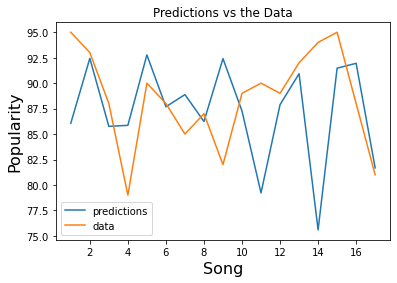

In [40]:
import matplotlib.pyplot as plt
t = np.linspace(1, len(pred), len(pred))
plt.plot(t, pred, label = "predictions")
plt.plot(t, y_test, label = "data")
plt.legend()
plt.ylabel("Popularity", size = 16)
plt.xlabel("Song", size = 16)
plt.title("Predictions vs the Data")
print("The Mean Squared Error is %.2f" %float(mse))

#Discussion

Our algoritm did not do a good job predictin the popularity of the songs because of couple of reasons.

The first big reason is the fact that our dataset is too small having only 50 songs in it.

Another reason why this algorithm is not a good predictior is the fact that we are using top 50 songs in 2021 for the training of the algorithm. This creates "survivorship bias" due to the fact that we only feed in the data of popular songs without having less popular songs in there. 

To fix these problems we used spotify API (http://organizeyourmusic.playlistmachinery.com/) to collect a better data set of various song and rerun the expetiment.

#Second attempt

##Uploading data

In [41]:
def load_data_new():
    return pd.read_csv('/content/sample_data/SpotifySongsProject - Sheet1.csv')


In [42]:
data_new = load_data_new()
total_data_new = data_new.copy()
total_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        319 non-null    int64 
 1   TITLE     319 non-null    object
 2   ARTIST    319 non-null    object
 3   TOPGENRE  319 non-null    object
 4   BPM       319 non-null    int64 
 5   NRGY      319 non-null    int64 
 6   DNCE      319 non-null    int64 
 7   DB        319 non-null    int64 
 8   LIVE      319 non-null    int64 
 9   VAL       319 non-null    int64 
 10  DUR       319 non-null    int64 
 11  ACOUS     319 non-null    int64 
 12  SPCH      319 non-null    int64 
 13  POP       319 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 35.0+ KB


In [43]:
x_new = []
y_new = []
for i in range(319):
  row = []
  row.append(total_data_new['BPM'][i])
  row.append(total_data_new['NRGY'][i])
  row.append(total_data_new['DNCE'][i])
  row.append(total_data_new['DB'][i])
  row.append(total_data_new['LIVE'][i])
  row.append(total_data_new['VAL'][i])
  row.append(total_data_new['DUR'][i])
  row.append(total_data_new['ACOUS'][i])
  row.append(total_data_new['SPCH'][i])
  x_new.append(row)
  y_new.append(total_data_new['POP'][i])

##Training the algorithm and fitting the test data into it.

In [44]:
params = {
    "n_estimators": 300,
    "max_depth": 5,
    "min_samples_split": 2,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size=0.33, random_state=42)
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train_new, y_train_new)
pred_new =reg.predict(X_test_new)
mse = mean_squared_error(y_test_new, reg.predict(X_test_new))

##Displaying the result

The Mean Squared Error is 208.45


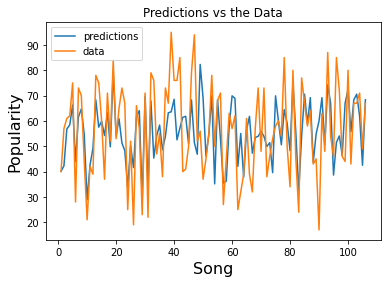

In [45]:
t = np.linspace(1, len(pred_new), len(pred_new))
plt.plot(t, pred_new, label = "predictions")
plt.plot(t, y_test_new, label = "data")
plt.legend()
plt.ylabel("Popularity", size = 16)
plt.xlabel("Song", size = 16)
plt.title("Predictions vs the Data")
print("The Mean Squared Error is %.2f" %float(mse))

#Discussion
The new result looks better based on the curviture of the plot. For the most part, the predicted values do follow the trend on the actual data (The predicted peaks match the actual peaks and the predicted dips match the actual dips). The mean squared error increased from 32.95 to 209.02 due to the higher varience of the dataset since now we have more than just popular songs in it.

Even though our prediction is following the right trend the predicted values do not truly match the actual malues. There could be multiple resons for such a high error:

1) Even though we increased our dataset from 50 to 300 songs, it is still not high enough number to run a good optimisation algorithm.

2) All those songs have different genres which is a big variable that was not introduces into the algorithm.

3) At this stage of machine learning technology human emotions are too complicated for a machine to understand how to predict what we will like.

Unfortunately, we cannot fix the third reason but in future work we can improve the algorithm by:

1) Getting an even bigger dataset with over 10 000 songs in it

2) Introdusing a song genre as a variable into the algorithm